In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
train_data = X_train.join(Y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7185,-118.17,34.04,39.0,563.0,138.0,682.0,137.0,2.7500,<1H OCEAN,150000.0
6515,-118.04,34.07,39.0,2451.0,649.0,2536.0,648.0,2.3098,<1H OCEAN,173100.0
8637,-118.41,33.88,40.0,925.0,254.0,371.0,227.0,5.2533,<1H OCEAN,500001.0
10880,-117.89,33.71,23.0,1422.0,260.0,1092.0,263.0,4.7422,<1H OCEAN,202400.0
4151,-118.21,34.12,41.0,1904.0,514.0,1666.0,498.0,3.6845,<1H OCEAN,175800.0
...,...,...,...,...,...,...,...,...,...,...
12938,-121.27,38.66,19.0,1891.0,266.0,678.0,255.0,6.1872,INLAND,188700.0
6930,-118.08,34.02,14.0,3789.0,810.0,2551.0,793.0,2.9321,<1H OCEAN,144200.0
17152,-122.20,37.43,22.0,3294.0,744.0,1337.0,655.0,5.2391,NEAR OCEAN,500001.0
13472,-117.38,34.07,6.0,1156.0,191.0,910.0,234.0,4.9091,INLAND,122400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

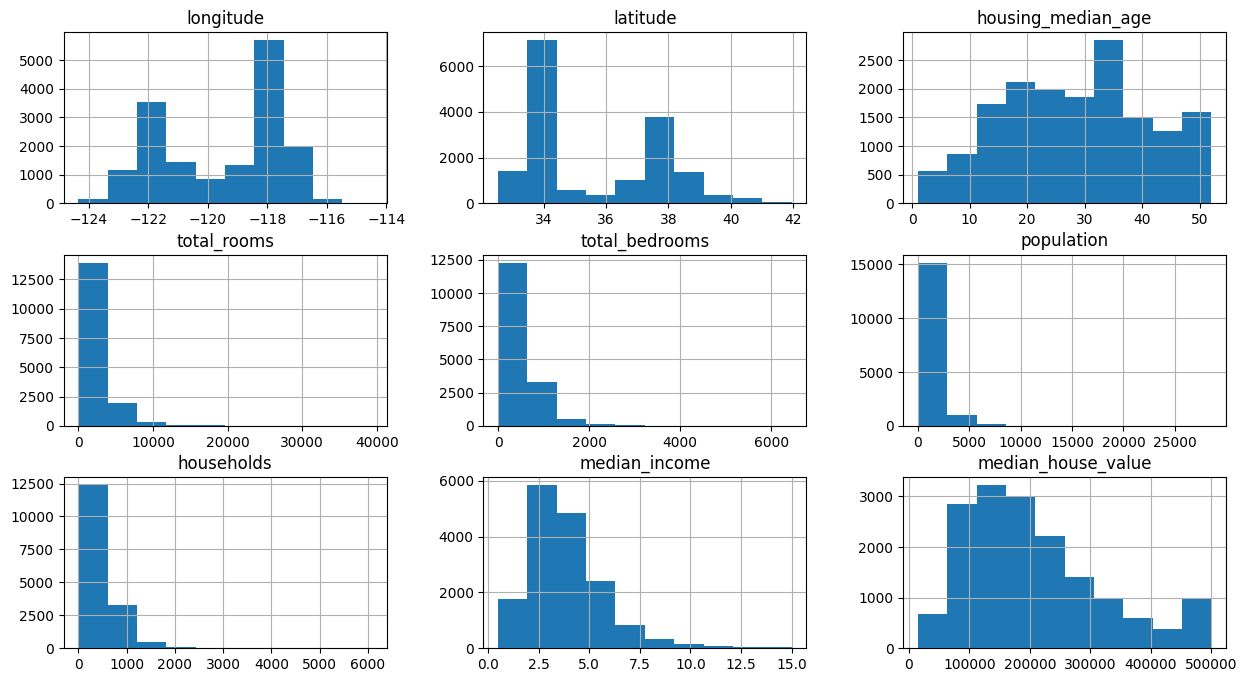

In [15]:
train_data.hist(figsize=(15,8))

<Axes: >

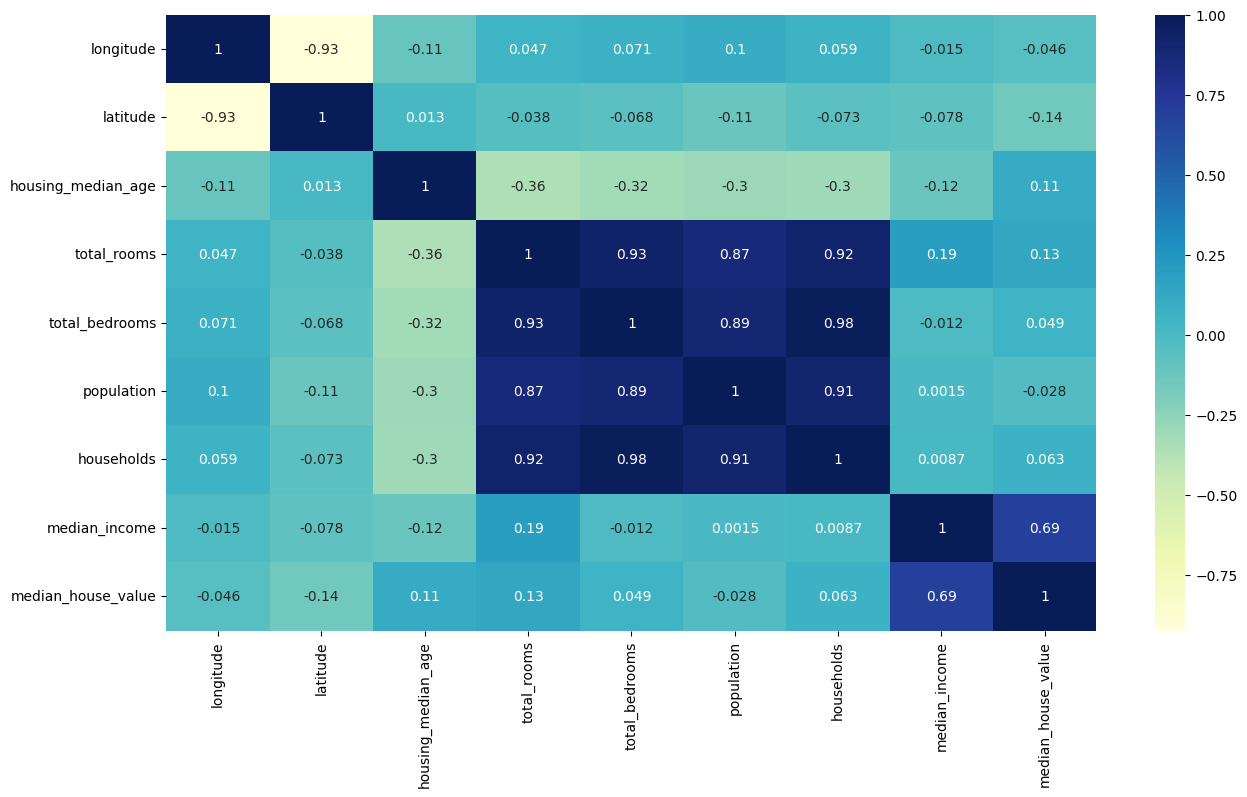

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [17]:
#Data Preprocesssing
#skew the graphs
train_data["total_rooms"] = np.log(train_data["total_rooms"] +1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] +1)
train_data["population"] = np.log(train_data["population"] +1)
train_data["households"] = np.log(train_data["households"] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

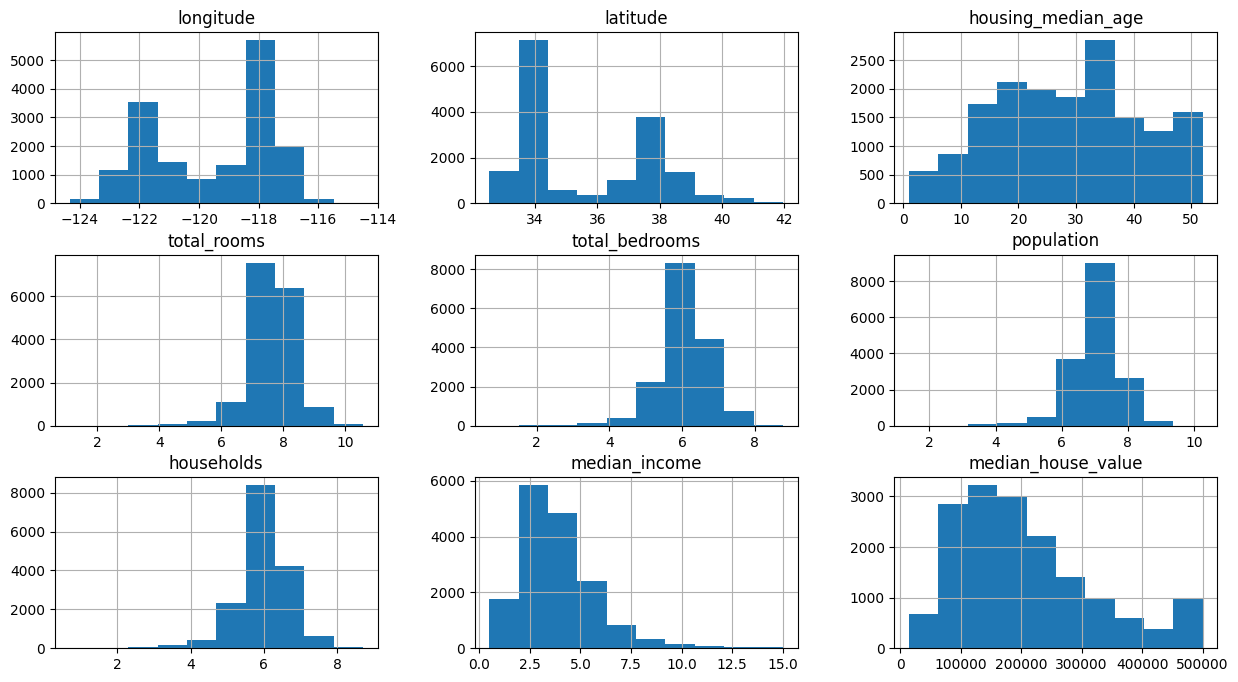

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
#Create dummies and join with train data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7185,-118.17,34.04,39.0,6.335054,4.934474,6.526495,4.927254,2.7500,150000.0,True,False,False,False,False
6515,-118.04,34.07,39.0,7.804659,6.476972,7.838738,6.475433,2.3098,173100.0,True,False,False,False,False
8637,-118.41,33.88,40.0,6.830874,5.541264,5.918894,5.429346,5.2533,500001.0,True,False,False,False,False
10880,-117.89,33.71,23.0,7.260523,5.564520,6.996681,5.575949,4.7422,202400.0,True,False,False,False,False
4151,-118.21,34.12,41.0,7.552237,6.244167,7.418781,6.212606,3.6845,175800.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,-121.27,38.66,19.0,7.545390,5.587249,6.520621,5.545177,6.1872,188700.0,False,True,False,False,False
6930,-118.08,34.02,14.0,8.240121,6.698268,7.844633,6.677083,2.9321,144200.0,True,False,False,False,False
17152,-122.20,37.43,22.0,8.100161,6.613384,7.198931,6.486161,5.2391,500001.0,False,False,False,False,True
13472,-117.38,34.07,6.0,7.053586,5.257495,6.814543,5.459586,4.9091,122400.0,False,True,False,False,False


<Axes: >

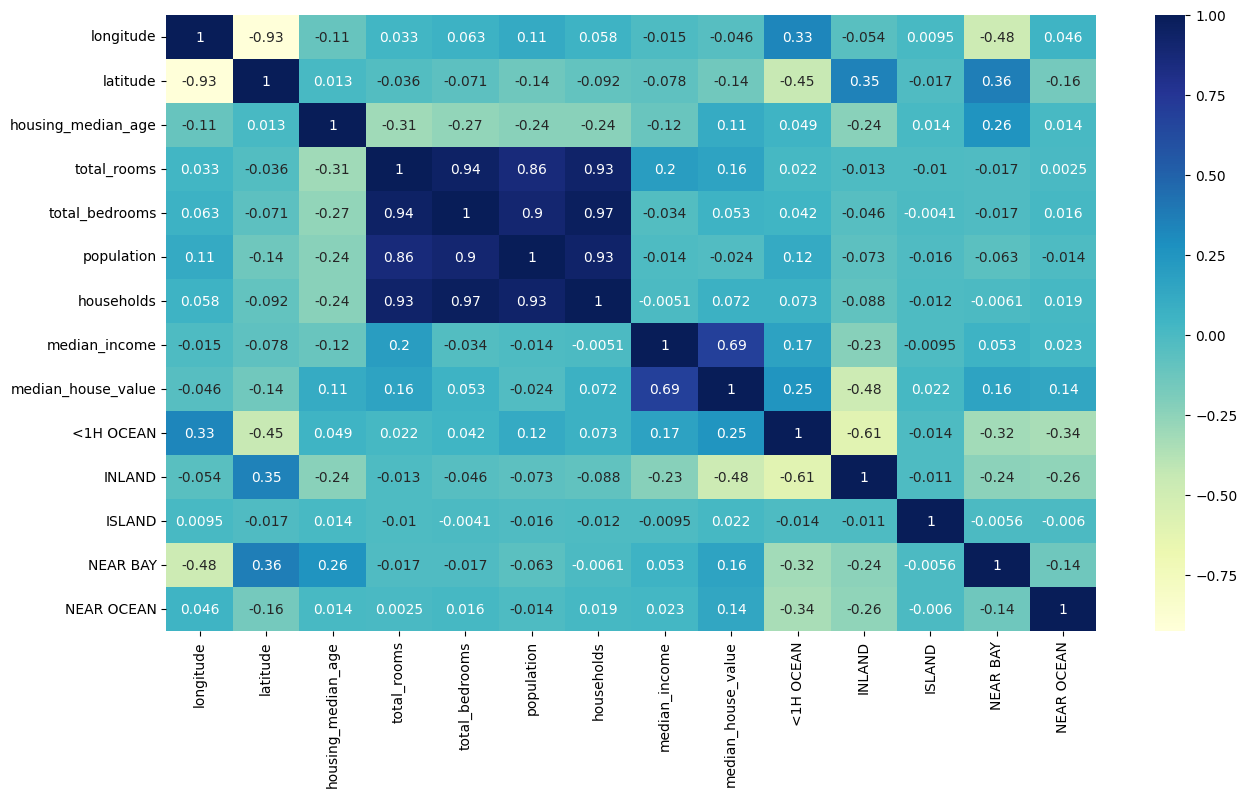

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

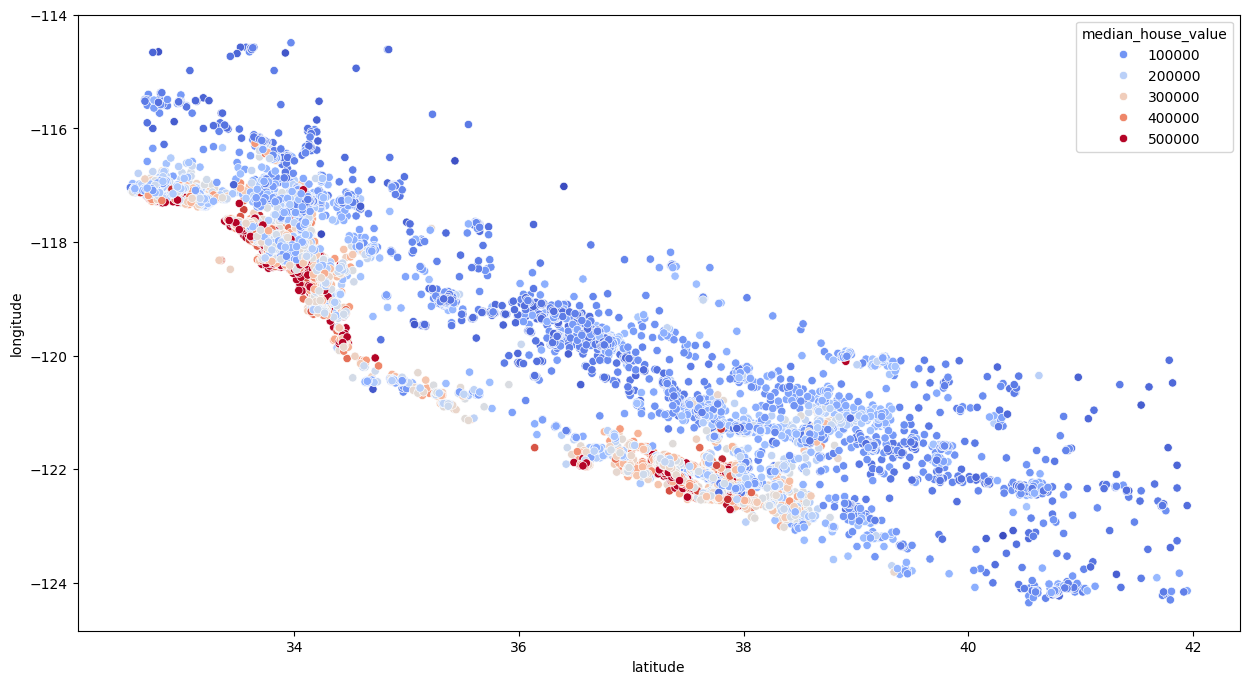

In [22]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data ,hue="median_house_value" ,palette="coolwarm")

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

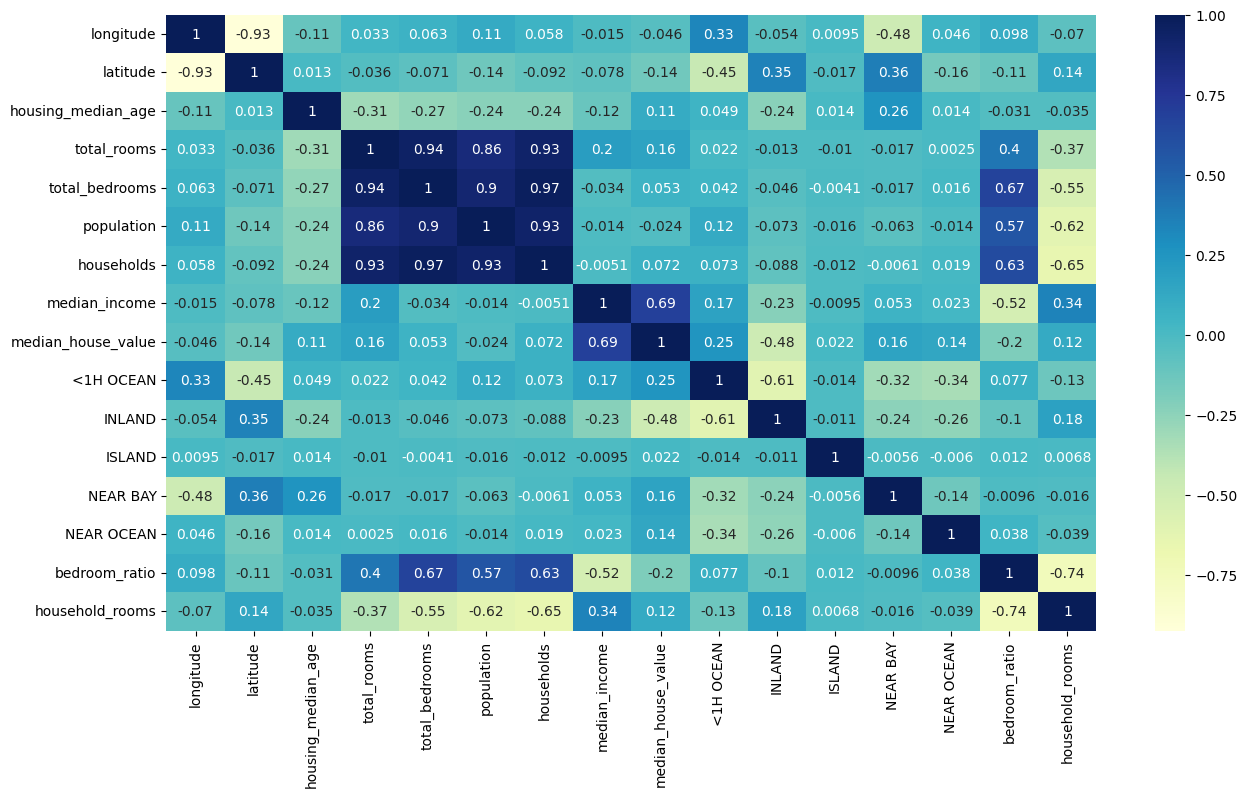

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [65]:
#SIMPLE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg=LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [66]:
test_data = X_test.join(Y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] +1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] +1)
test_data["population"] = np.log(test_data["population"] +1)
test_data["households"] = np.log(test_data["households"] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [67]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
x_test_s = scaler.fit_transform(x_test)

In [68]:
#Accuracy of Linear Regression
reg.score(x_test_s,y_test)

0.6832818420801798

In [69]:
#Mean Absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = forest.predict(x_test_s)
mean_absolute_error(y_test,y_pred)

107474.14069977979

In [70]:
#sqaure root of mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

129324.01945895483

In [56]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
#Accuracy of Random Forest
forest.score(x_test,y_test)

0.8093691295294193

In [58]:
#Mean Absolute error
y_pred = forest.predict(x_test)
mean_absolute_error(y_test,y_pred)

32415.33675067287

In [59]:
#sqaure root of mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

50095.22032505661